In [12]:
from astropy.io import fits
import numpy as np
from magpyx.utils import ImageStream
from magpyx.utils import send_shmim_to_fits, send_fits_to_shmim
import matplotlib.pyplot as plt
from datetime import datetime
import time
from purepyindi.client import INDIClient

In [104]:

pathToModes='/data/PWFS/strehlData/cacaoCalib/DMmodes_2020-10-05_19:34:36.fits'
fModes=fits.open(pathToModes)
pathToData='/data/PWFS/linearExp/imgFrames/'
pathToDarks='/data/PWFS/linearExp/Darks/'
pathToFlats='/data/PWFS/linearExp/Flats/'

Filename: /data/PWFS/strehlData/cacaoCalib/DMmodes_2020-10-05_19:34:36.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (32, 32, 509)   float32   
(509, 32, 32)


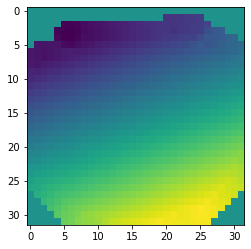

In [14]:
### Pull modes out out
fModes.info()
mode=fModes[0].data
print(np.shape(mode))
plt.imshow(mode[1,:,:])

h=fModes[0].header
a=h['NAXIS3']

In [15]:
## CONFIGS
shmim_name="dm00disp03"
nImages=300
experimentName="LinearExp"
#nModes=a
nModes=10 # number of modes to scan through for the linearity test.

nAmps=np.arange(-0.0001, 0.1, 0.005) # amplitudes of the mode applied to the dm in microns.
vNorm=1/0.519 #volume normalization factor for the DM to get the correct amplitude of poke.

nAmps=nAmps*vNorm

In [17]:
##### GENERATE FITS HEADERS

#For Every saved file:
now=datetime.now()
dateStr=now.strftime("_%m-%d-%Y_%H:%M:%S_")
siglentAmplitude=0.8
siglentFreq=1000



#INDI information
c=INDIClient('localhost', 7624)
c.start()

time.sleep(5)

In [18]:
#INDI information
c=INDIClient('localhost', 7624)
c.start()
time.sleep(1)
#camtipExpTime=c['camtip.exptime.current']
zylaExpTime=0.001
sciExpTime=0.0003
tipExpTime=0.01
c['camtip.exptime.target']=tipExpTime
c['camsci.exptime.target']=sciExpTime
c['camzyla.exptime.target']=zylaExpTime

In [19]:
       
# Time stamp
now=datetime.now()
dateStr=now.strftime("_%m-%d-%Y_%H:%M:%S_")
        

#zyla
camzylaExpTime=c['camzyla.exptime.current']
camzylaFrameRate=c['camzyla.fps.current']
camzylaROIsize=c['camzyla.fg_frameSize.width']

#camsci
camsciExpTime=c['camsci.exptime.current']
#camtip
camtipExpTime=c['camtip.exptime.current']

In [20]:
camsci=ImageStream("camsci")
camtip=ImageStream("camtip")
camzyla=ImageStream("camzyla")
dm=ImageStream("dm00disp03")



In [105]:
##### TAKE DARKS ########

nameZyla= pathToFlats+"camzylaFlatFrames.fits"
nameCamsci= pathToFlats+"camsciFlatFrames.fits"
nameCamtip= pathToFlats+"camtipFlatFrames.fits"

## Zyla -------------------------------------------
if nImages==1:
    zyladata=camzyla.grab_latest()
else:
    zyladata=np.squeeze(camzyla.grab_many(nImages))
    # Get INDI data        

   #Generate Headers     
y=fits.PrimaryHDU(zyladata)
y.header['ExpTime']=camzylaExpTime
y.header['TStamp']=dateStr
y.header['ModAmp']=siglentAmplitude
y.header['ModFreq']=siglentFreq
y.header['FPS']=camzylaFrameRate
y.header['ROIsize']=camzylaROIsize
y.header['nMode']= nModes
y.header['ExpName']=experimentName
     
  #write file      
y.writeto(nameZyla)
time.sleep(2)
print('Finished camzyla')
        
## Camsci ----------------------------------------------
if nImages==1:
    scidata=camsci.grab_latest()
else:
    scidata=np.squeeze(camsci.grab_many(nImages))
    # Get INDI data        

   #Generate Headers     
x=fits.PrimaryHDU(scidata)
x.header['ExpTime']=camsciExpTime
x.header['TStamp']=dateStr
x.header['ModAmp']=siglentAmplitude
x.header['ModFreq']=siglentFreq
x.header['nMode']= nModes
x.header['ExpName']=experimentName
     
  #write file      
x.writeto(nameCamsci)
time.sleep(2)
print('Finished camsci')
       

Finished camzyla
Finished camsci


In [106]:
 
## Camtip ----------------------------------------------
if nImages==1:
    tipdata=camtip.grab_latest()
else:
    tipdata=np.squeeze(camtip.grab_many(nImages))
    # Get INDI data        

   #Generate Headers     
z=fits.PrimaryHDU(tipdata)
z.header['ExpTime']=camtipExpTime
z.header['TStamp']=dateStr
z.header['ModAmp']=siglentAmplitude
z.header['ModFreq']=siglentFreq
z.header['nMode']= nModes
z.header['ExpName']=experimentName
     
  #write file      
z.writeto(nameCamtip)
time.sleep(2)
print('Finished camtip')

Finished camtip


In [102]:
nAmps=np.array([-0.0001, -0.0005, -0.001, -0.005, -0.01, -0.05, -0.1,-0.5, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]) # amplitudes of the mode applied to the dm in microns.
nPoke=nAmps;

vNorm=1/0.519 #volume normalization factor for the DM to get the correct amplitude of poke.
 #Get rid of 0's in nAmps
nAmps=nAmps*vNorm
#nAmps=np.round(nAmps, decimals=3)
nAmps=nAmps[nAmps !=0]
sz=np.shape(nAmps)
print(sz)
print(nAmps)
nModes=6

for i in range(nModes):
    print(i)



(16,)
[-1.92678227e-04 -9.63391137e-04 -1.92678227e-03 -9.63391137e-03
 -1.92678227e-02 -9.63391137e-02 -1.92678227e-01 -9.63391137e-01
  9.63391137e-01  1.92678227e-01  9.63391137e-02  1.92678227e-02
  9.63391137e-03  1.92678227e-03  9.63391137e-04  1.92678227e-04]
0
1
2
3
4
5


In [ ]:
for i in range(nModes):
    for j in range(sz[0]):
        nameZyla= pathToData+"camzyla"+experimentName+"Mode"+str(i)+"AmpNum"+str(j)+".fits"
        nameCamsci= pathToData+"camsci"+experimentName+"Mode"+str(i)+"AmpNum"+str(j)+".fits"
        nameCamtip= pathToData+"camtip"+experimentName+"Mode"+str(i)+"AmpNum"+str(j)+".fits"
   
        #send DM commands
        dmCom=mode[i,:,:]*nAmps[j]
        dm.write(dmCom.astype(dm.buffer.dtype))  
        time.sleep(5)
        print("Amp=" , nAmps[j])
        print("Mode=",i)
        #Take data and save it
## Zyla -------------------------------------------
        if nImages==1:
            zyladata=camzyla.grab_latest()
        else:
            zyladata=np.squeeze(camzyla.grab_many(nImages))
    # Get INDI data        

   #Generate Headers     
        y=fits.PrimaryHDU(zyladata)
        y.header['ExpTime']=camzylaExpTime
        y.header['TStamp']=dateStr
        y.header['ModAmp']=siglentAmplitude
        y.header['ModFreq']=siglentFreq
        y.header['FPS']=camzylaFrameRate
        y.header['ROIsize']=camzylaROIsize
        y.header['nMode']=i
        y.header['PokeAmp']=nPoke[j]
        y.header['NormPAmp']=nAmps[j]
        y.header['ExpName']=experimentName
     
  #write file      
        y.writeto(nameZyla)
        time.sleep(2)
        print('Finished camzyla')
        
## Camsci ----------------------------------------------
        if nImages==1:
            scidata=camsci.grab_latest()
        else:
            scidata=np.squeeze(camsci.grab_many(nImages))
    # Get INDI data        

   #Generate Headers     
        y=fits.PrimaryHDU(scidata)
        y.header['ExpTime']=camsciExpTime
        y.header['TStamp']=dateStr
        y.header['ModAmp']=siglentAmplitude
        y.header['ModFreq']=siglentFreq
        y.header['nMode']= i
        y.header['PokeAmp']=nPoke[j]
        y.header['NormPAmp']=nAmps[j]
        y.header['ExpName']=experimentName
     
  #write file      
        y.writeto(nameCamsci)
        time.sleep(2)
        print('Finished camsci')
        
## Camtip ----------------------------------------------
        if nImages==1:
            tipdata=camtip.grab_latest()
        else:
            tipdata=np.squeeze(camtip.grab_many(nImages))
    # Get INDI data        

   #Generate Headers     
        y=fits.PrimaryHDU(tipdata)
        y.header['ExpTime']=camtipExpTime
        y.header['TStamp']=dateStr
        y.header['ModAmp']=siglentAmplitude
        y.header['ModFreq']=siglentFreq
        y.header['nMode']= i
        y.header['PokeAmp']=nPoke[j]
        y.header['NormPAmp']=nAmps[j]
        y.header['ExpName']=experimentName
     
  #write file      
        y.writeto(nameCamtip)
        time.sleep(2)
        print('Finished camtip')


print('Finished Experiment')    

In [ ]:
camsci.close()
camtip.close()
camzyla.close()
dm.close()

In [103]:
np.save('/data/PWFS/linearExp/nAmps.npy',nAmps)
np.save('/data/PWFS/linearExp/nPoke.npy', nPoke)
np.save('/data/PWFS/linearExp/modes.npy', mode)
np.save('/data/PWFS/linearExp/modeNum.npy', 6)